In [1]:
import MeCab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import gensim
import tensorflow
import keras

Using TensorFlow backend.


## 第70問

In [57]:
train = pd.read_csv("Part6_result/train.txt",sep="\t",header=None)
valid = pd.read_csv("Part6_result/valid.txt",sep="\t",header=None)
test = pd.read_csv("Part6_result/test.txt",sep="\t",header=None)

model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin",binary="True")

#Newsデータと正解データに分割
X_train_N = train.iloc[:,0]
Y_train = train.iloc[:,1]
X_train_N.to_csv("Part8_Result/X_train_N.txt",header=None,index=None)
Y_train.to_csv("Part8_Result/Y_train.txt",header=None,index=None)
#Newsデータと正解データに分割
X_valid_N = valid.iloc[:,0]
Y_valid = valid.iloc[:,1]
X_valid_N.to_csv("Part8_Result/X_valid_N.txt",header=None,index=None)
Y_valid.to_csv("Part8_Result/Y_valid.txt",header=None,index=None)
#Newsデータと正解データに分割
X_test_N = test.iloc[:,0]
Y_test = test.iloc[:,1]
X_test_N.to_csv("Part8_Result/X_test_N.txt",header=None,index=None)
Y_test.to_csv("Part8_Result/Y_test.txt",header=None,index=None)

#Newsデータより、特徴量ベクトルを抽出し格納するような関数を作成
#trainだけでなく、validやtestでも同じ処理を実行するため

#ついでに、書き込みファイル作成もまとめてやっちゃう
def Change_VEC(f_name,df):
    with open(f_name,"w",encoding="utf-8_sig") as g:
        for text in df.iloc[:,0]: #1行1行に分ける
            if text == "TITLE":
                continue
            #1行1行やる操作
            words = text.split() #1行を各単語のリストに分ける
            vecs = []
            for word in words:
                
                if word in model.vocab: #例のmodelの中にある語彙であれば
                    vecs.append(model[word]) #その情報をvecsに格納しておく(特徴量算出のため)
            
            if len(vecs) == 0: #1つも例のモデル内の語彙がなかった場合は、計算上0としたいので、zerosで埋める
                vec = np.zeros(300)
            
            else:
                #numpyのmean関数で簡単に計算したいので、numpyに変換
                #なぜ、mean関数を使うかは問題文より参照
                vecs = np.array(vecs)
                #meanを取る。(列ごとに取る=各単語ごとのデータとしたいため)
                vec = vecs.mean(axis=0)
            
            #一部numpyのままのものもあるので、strのlistに変換しておく(出力のため)
            vec = vec.astype(np.str).tolist()
            out = " ".join(vec)+"\n"
            g.write(out)

Change_VEC("Part8_Result/X_train.txt",train)
Change_VEC("Part8_Result/X_valid.txt",valid)
Change_VEC("Part8_Result/X_test.txt",test)

## 第71問

In [2]:
import tensorflow as tf
import keras
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
#できるだけtensorflow & kerasを使って、NNを構築してみることにする
#参考サイトは、pytorch
from keras.models import Sequential
from keras.layers import Dense, Activation

In [5]:
X_train = np.loadtxt("Part8_Result/X_train.txt",delimiter=" ",encoding="utf-8_sig")
#X_train_tensor = tf.Tensor(X_train, dtype="float32")
X_train_tensor = tf.convert_to_tensor(X_train,dtype=tf.float32)

W = tf.random.uniform(shape = [300,4])
mult1 = tf.matmul(X_train_tensor[:1], W)
mult2 = tf.matmul(X_train_tensor[:4], W)

s_max_y = tf.nn.softmax(mult1)
s_max_Y = tf.nn.softmax(mult2)

print(s_max_y)
print(s_max_Y)

tf.Tensor([[0.5677647  0.08255479 0.10618035 0.24350016]], shape=(1, 4), dtype=float32)
tf.Tensor(
[[0.56776464 0.08255478 0.10618036 0.24350022]
 [0.29636744 0.34606418 0.13720709 0.22036137]
 [0.3288409  0.18501835 0.31145063 0.17469017]
 [0.2422328  0.19721244 0.12621473 0.43434   ]], shape=(4, 4), dtype=float32)


In [4]:
#pytouch版
#行列Wの乱数によって、結果はやや異なる⇒行列のサイズが同じであればOK
import torch

In [44]:
X_train = np.loadtxt("Part8_Result/X_train.txt",delimiter=" ",encoding="utf-8_sig")
#X_train_tensor = tf.Tensor(X_train, dtype="float32")
X_train_torch = torch.tensor(X_train,dtype=torch.float32)

W = torch.randn(300,4)

softmax = torch.nn.Softmax(dim=1)

mult1 = torch.matmul(X_train_torch[:1], W)
mult2 = torch.matmul(X_train_torch[:4], W)

s_max_y = softmax(mult1)
s_max_Y = softmax(mult2)

print(s_max_y)
print(s_max_Y)

tensor([[4.1746e-05, 1.4235e-02, 9.8377e-01, 1.9563e-03]])
tensor([[4.1746e-05, 1.4235e-02, 9.8377e-01, 1.9563e-03],
        [3.7675e-01, 1.7458e-01, 1.5681e-01, 2.9185e-01],
        [1.2585e-01, 9.7918e-02, 7.0691e-01, 6.9328e-02],
        [2.0765e-01, 4.2788e-01, 1.3557e-01, 2.2890e-01]])


## 第72問

In [38]:
#見た感じ、あっていないかも...
#ランダムを揃えたら、これがあってたことが発覚...(3日かかった)

X_train = np.loadtxt("Part8_Result/X_train.txt",delimiter=" ",encoding="utf-8_sig")
Y_train = np.loadtxt("Part8_Result/Y_train.txt",encoding="utf-8_sig",skiprows=1)

#X_train_tensor = tf.Tensor(X_train, dtype="float32")
X_train_tensor = tf.convert_to_tensor(X_train,dtype=tf.float32)
Y_train_tensor = tf.convert_to_tensor(Y_train,dtype=tf.int64) #カテゴライズデータ

#tf.random_uniformでも出来る
w = np.random.randn(300,4)
W = tf.convert_to_tensor(w,dtype=tf.float32)
print(W)

mult1 = tf.matmul(X_train_tensor[:1], W)
mult2 = tf.matmul(X_train_tensor[:4], W)

#softmax関数に代入し、-log[i]まで一括で計算してくれる
s_max_y_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=mult1,labels=Y_train_tensor[:1])
s_max_Y_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=mult2,labels=Y_train_tensor[:4])

print(s_max_y_loss)
print(s_max_Y_loss)

print(np.mean(s_max_y_loss.numpy()))
print(np.mean(s_max_Y_loss.numpy()))

tf.Tensor(
[[ 0.3757399   0.06263219 -0.51204264  0.64018244]
 [-0.83198017 -1.4925216   0.49056664  0.9705013 ]
 [ 0.54917926 -0.5776748  -0.13133854  0.99369276]
 ...
 [ 0.32902986 -1.4235828  -1.0729693  -0.34722292]
 [-1.4687403   0.4630384  -2.4126754  -0.352828  ]
 [-1.2008674   0.79131126 -1.0708482  -0.99025303]], shape=(300, 4), dtype=float32)
tf.Tensor([5.1017947], shape=(1,), dtype=float32)
tf.Tensor([5.1017942 0.9555923 1.059228  1.1823287], shape=(4,), dtype=float32)
5.1017947
2.0747356


In [39]:
#torch版

X_train = np.loadtxt("Part8_Result/X_train.txt",delimiter=" ",encoding="utf-8_sig")
Y_train = np.loadtxt("Part8_Result/Y_train.txt",encoding="utf-8_sig",skiprows=1)

#X_train_tensor = tf.Tensor(X_train, dtype="float32")
X_train_torch = torch.tensor(X_train,dtype=torch.float32)
Y_train_torch = torch.tensor(Y_train,dtype=torch.int64)

#W = torch.randn(300,4)
W = torch.tensor(w,dtype=torch.float32)

print(W)

loss = torch.nn.CrossEntropyLoss()

mult1 = torch.matmul(X_train_torch[:1], W)
mult2 = torch.matmul(X_train_torch[:4], W)

s_max_y_loss = loss(mult1,Y_train_torch[:1])
s_max_Y_loss = loss(mult2,Y_train_torch[:4])

print(s_max_y_loss)
print(s_max_Y_loss)

ans = [] # 以下、確認
softmax = torch.nn.Softmax(dim=1)
for s,i in zip(softmax(mult1),Y_train_torch[:4]):
    ans.append(-np.log(s[i]))
print (np.mean(ans))

tensor([[ 0.3757,  0.0626, -0.5120,  0.6402],
        [-0.8320, -1.4925,  0.4906,  0.9705],
        [ 0.5492, -0.5777, -0.1313,  0.9937],
        ...,
        [ 0.3290, -1.4236, -1.0730, -0.3472],
        [-1.4687,  0.4630, -2.4127, -0.3528],
        [-1.2009,  0.7913, -1.0708, -0.9903]])
tensor(5.1018)
tensor(2.0747)
5.1017933


In [40]:
#loss関数を変えてみる①

X_train = np.loadtxt("Part8_Result/X_train.txt",delimiter=" ",encoding="utf-8_sig")
Y_train = np.loadtxt("Part8_Result/Y_train.txt",encoding="utf-8_sig",skiprows=1)

#X_train_tensor = tf.Tensor(X_train, dtype="float32")
X_train_tensor = tf.convert_to_tensor(X_train,dtype=tf.float32)
Y_train_tensor = tf.convert_to_tensor(Y_train,dtype=tf.int64) #カテゴライズデータ

#w = np.random.randn(300,4)
W = tf.convert_to_tensor(w,dtype=tf.float32)
print(W)
#W = tf.random.uniform(shape = [300,4])

mult1 = tf.matmul(X_train_tensor[:1], W)
mult2 = tf.matmul(X_train_tensor[:4], W)

cce = tf.keras.losses.CategoricalCrossentropy()

s_max_y_loss = cce(Y_train_tensor[:1],mult1)
s_max_Y_loss = cce(Y_train_tensor[:4],mult2)

print(s_max_y_loss)
print(s_max_Y_loss)

print(np.mean(s_max_y_loss.numpy()))
print(np.mean(s_max_Y_loss.numpy()))


tf.Tensor(
[[ 0.3757399   0.06263219 -0.51204264  0.64018244]
 [-0.83198017 -1.4925216   0.49056664  0.9705013 ]
 [ 0.54917926 -0.5776748  -0.13133854  0.99369276]
 ...
 [ 0.32902986 -1.4235828  -1.0729693  -0.34722292]
 [-1.4687403   0.4630384  -2.4126754  -0.352828  ]
 [-1.2008674   0.79131126 -1.0708482  -0.99025303]], shape=(300, 4), dtype=float32)
tf.Tensor(16.118095, shape=(), dtype=float32)
tf.Tensor(33.254692, shape=(), dtype=float32)
16.118095
33.254692


## 第73問

In [5]:
#ここからは時間がかかってしまうので、pytouchで進むことにする
#また勉強次第、tensorflow&kerasで実装してみる

#https://qiita.com/perrying/items/857df46bb6cdc3047bd8

import time

In [7]:
from torch.utils.data import TensorDataset, DataLoader

class ModelSet(torch.nn.Module):
    def __init__(self):
        super(ModelSet,self).__init__()
        self.net = torch.nn.Sequential(torch.nn.Linear(300,4),) #(300,4)の線形モデルをセット
    def forward(self,x):
        return self.net(x)


#torch版

X_train = np.loadtxt("Part8_Result/X_train.txt",delimiter=" ",encoding="utf-8_sig")
Y_train = np.loadtxt("Part8_Result/Y_train.txt",encoding="utf-8_sig",skiprows=1)

#X_train_tensor = tf.Tensor(X_train, dtype="float32")
X_train_torch = torch.tensor(X_train,dtype=torch.float32)
Y_train_torch = torch.tensor(Y_train,dtype=torch.int64)

model = ModelSet() #モデルをセット
DataSet = TensorDataset(X_train_torch,Y_train_torch) #データを読み込み

#DataLoaderを作っとく
Loader = DataLoader(DataSet,batch_size=1,shuffle=True)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.net.parameters(),lr=1e-1)


for epoch in range(50): #epoch数を10回にする
    t1 = time.time()
    for xx,yy in Loader: #データはloader内に入っているモノ
        y_pred = model(xx) #モデルから予想するよ
        loss = loss_fn(y_pred, yy) #lossを計算
        optimizer.zero_grad() #勾配の初期化
        loss.backward() #ロスの計算
        optimizer.step() #パラメータの更新
    t2 = time.time()
    print(t2-t1)

print("\n")
print(model)

76.7620141506195
76.77028942108154
76.71677136421204
76.52973937988281
76.60186195373535
76.65069484710693
76.53457045555115
76.72915196418762
76.85597920417786
76.67757081985474
76.5440034866333
76.47955250740051
76.47177362442017
76.54242014884949
76.4680335521698
76.36132144927979
76.64822578430176
76.59861373901367
76.69406986236572
76.49368023872375
76.59206008911133
76.449951171875
76.59204196929932
76.4914915561676
76.45233845710754
76.61839127540588
76.98186779022217
76.62101483345032
76.67994332313538
76.67854452133179
76.55843448638916
76.53993725776672
76.40220332145691
76.57310771942139
76.41285991668701
76.37564754486084
76.64068675041199
76.53337240219116
76.53980588912964
76.38165235519409
76.52867412567139
76.59513568878174
76.55326724052429
76.60023617744446
76.6495623588562
76.44717907905579
76.5008065700531
76.51099920272827
76.48699021339417
76.4136118888855


ModelSet(
  (net): Sequential(
    (0): Linear(in_features=300, out_features=4, bias=True)
  )
)


## 第74問

In [78]:
def accuracy(pred,real):
    pred = pred.data.numpy()
    real = real.data.numpy()
    return (pred == real).mean()

X_valid = np.loadtxt("Part8_Result/X_valid.txt",delimiter=" ",encoding="utf-8_sig")
Y_valid = np.loadtxt("Part8_Result/Y_valid.txt",encoding="utf-8_sig",skiprows=1)

#X_train_tensor = tf.Tensor(X_train, dtype="float32")
X_valid_torch = torch.tensor(X_valid,dtype=torch.float32)
Y_valid_torch = torch.tensor(Y_valid,dtype=torch.int64)

print(model(X_valid_torch))

print(Y_valid_torch)

#この各列が、b,e,t,mのニュースの強さを表している
#つまり、値が最大のインデックス番号と、値そのものが同じであれば正答といえる。

#これらは、1行において各列ごとの最大値を抽出していることと同義である
#つまり、argmax(axis=1) or Max(axis=1)で行方向に最大値を見る必要がある。

'''
pred = model(X_train_torch)
print(accuracy(pred,Y_train_torch))
real = model(X_valid_torch)
print(accuracy(real,Y_valid_torch))
'''

tensor([[ 0.1865,  4.6893, -3.7390, -0.9997],
        [-1.4451, -1.1581,  4.6907, -1.9132],
        [ 4.9604, -0.4382, -1.3363, -3.0302],
        ...,
        [-0.9681, -0.3546, -1.5177,  2.7427],
        [ 0.0639, -2.4587,  6.6338, -4.1589],
        [-2.0796,  2.0991,  1.2544, -1.1921]], grad_fn=<AddmmBackward>)
tensor([1, 2, 0,  ..., 3, 2, 1])


'\npred = model(X_train_torch)\nprint(accuracy(pred,Y_train_torch))\nreal = model(X_valid_torch)\nprint(accuracy(real,Y_valid_torch))\n'

In [91]:
def accuracy(pred,real):
    pred = np.argmax(pred.data.numpy(),axis=1)
    real = real.data.numpy()
    sum_acc = 0
    for p,r in zip(pred, real):
        if p == r:
            sum_acc += 1
    k = sum_acc / len(real)
    return k

X_valid = np.loadtxt("Part8_Result/X_valid.txt",delimiter=" ",encoding="utf-8_sig")
Y_valid = np.loadtxt("Part8_Result/Y_valid.txt",encoding="utf-8_sig",skiprows=1)

#X_train_tensor = tf.Tensor(X_train, dtype="float32")
X_valid_torch = torch.tensor(X_valid,dtype=torch.float32)
Y_valid_torch = torch.tensor(Y_valid,dtype=torch.int64)

#この各列が、b,e,t,mのニュースを表している
#つまり、値が最大のインデックス番号と、値そのものが同じであれば正答といえる。

pred = model(X_train_torch)
print(accuracy(pred,Y_train_torch))
real = model(X_valid_torch)
print(accuracy(real,Y_valid_torch))

0.8464201695592347
0.8428341461105061


## 第75問

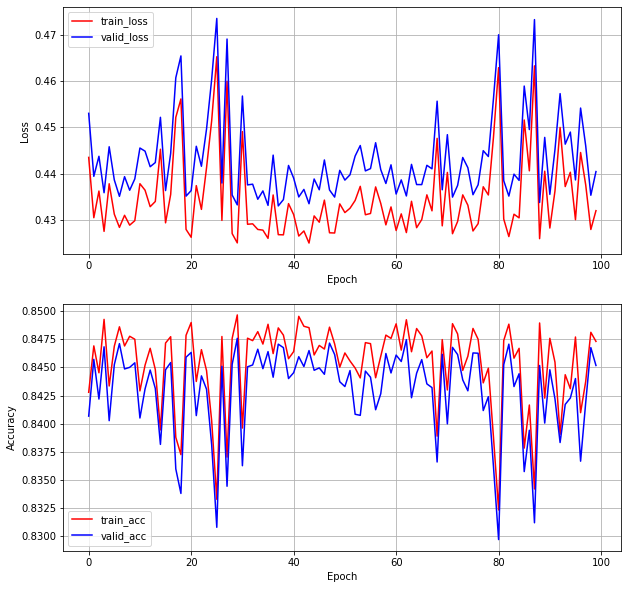

In [13]:
from torch.utils.data import TensorDataset, DataLoader

class ModelSet(torch.nn.Module):
    def __init__(self):
        super(ModelSet,self).__init__()
        self.net = torch.nn.Sequential(torch.nn.Linear(300,4),) #(300,4)の線形モデルをセット
    def forward(self,x):
        return self.net(x)

def accuracy(pred,real):
    pred = np.argmax(pred.data.numpy(),axis=1)
    real = real.data.numpy()
    sum_acc = 0
    for p,r in zip(pred, real):
        if p == r:
            sum_acc += 1
    k = sum_acc / len(real)
    return k

#trainデータの読み込み
X_train = np.loadtxt("Part8_Result/X_train.txt",delimiter=" ",encoding="utf-8_sig")
Y_train = np.loadtxt("Part8_Result/Y_train.txt",encoding="utf-8_sig",skiprows=1)

X_train_torch = torch.tensor(X_train,dtype=torch.float32)
Y_train_torch = torch.tensor(Y_train,dtype=torch.int64)

#validデータの読み込み
X_valid = np.loadtxt("Part8_Result/X_valid.txt",delimiter=" ",encoding="utf-8_sig")
Y_valid = np.loadtxt("Part8_Result/Y_valid.txt",encoding="utf-8_sig",skiprows=1)

X_valid_torch = torch.tensor(X_valid,dtype=torch.float32)
Y_valid_torch = torch.tensor(Y_valid,dtype=torch.int64)


model = ModelSet() #モデルをセット
DataSet = TensorDataset(X_train_torch,Y_train_torch) #データを読み込み

#DataLoaderを作っとく
Loader = DataLoader(DataSet,batch_size=1,shuffle=True)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.net.parameters(),lr=1e-1)

#pltで簡単に作ることにする
epochs = []
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for epoch in range(100): #epoch数をn回にする
    #一応epoch数もラベルとして使うので、格納
    epochs.append(epoch)
    
    t1 = time.time()
    
    for xx,yy in Loader: #データはloader内に入っているモノ
        y_pred = model(xx) #モデルから予想するよ
        loss = loss_fn(y_pred, yy) #lossを計算
        optimizer.zero_grad() #勾配の初期化
        loss.backward() #ロスの計算
        optimizer.step() #パラメータの更新
    
    t2 = time.time()
    #print("今回のエポックの計算時間は" + str(t2-t1))
    
    #trainデータに対して
    Y_train_pred = model(X_train_torch) #モデルに突っ込む
    loss_train = loss_fn(Y_train_pred, Y_train_torch) #予想と実際のロスの計算
    train_loss.append(loss_train) #配列にappend
    acc_train  = accuracy(Y_train_pred, Y_train_torch) #精度の計算
    train_acc.append(acc_train) #配列にappend
    
    #validデータに対して
    Y_valid_pred = model(X_valid_torch) #モデルに突っ込む
    loss_valid = loss_fn(Y_valid_pred, Y_valid_torch) #予想と実際のロスの計算
    valid_loss.append(loss_valid) #配列にappend
    acc_valid  = accuracy(Y_valid_pred, Y_valid_torch) #精度の計算
    valid_acc.append(acc_valid) #配列にappend
    
    t3 = time.time()
    #print("今回のロス・精度の計算時間は" + str(t3-t2))

#横軸にepoch数、縦軸にlossとaccuracyを取ったグラフを書く
fig, ax = plt.subplots(2,1,figsize=(10,10))
#EpochとLoss
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].grid()
ax[0].plot(epochs, train_loss, color="red", label="train_loss")
ax[0].plot(epochs, valid_loss, color="blue", label="valid_loss")
ax[0].legend(loc=0)
#Epochとaccuracy
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].grid()
ax[1].plot(epochs, train_acc, color="red", label="train_acc")
ax[1].plot(epochs, valid_acc, color="blue", label="valid_acc")
ax[1].legend(loc=0)

plt.show()

## 第76問

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\torch\storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


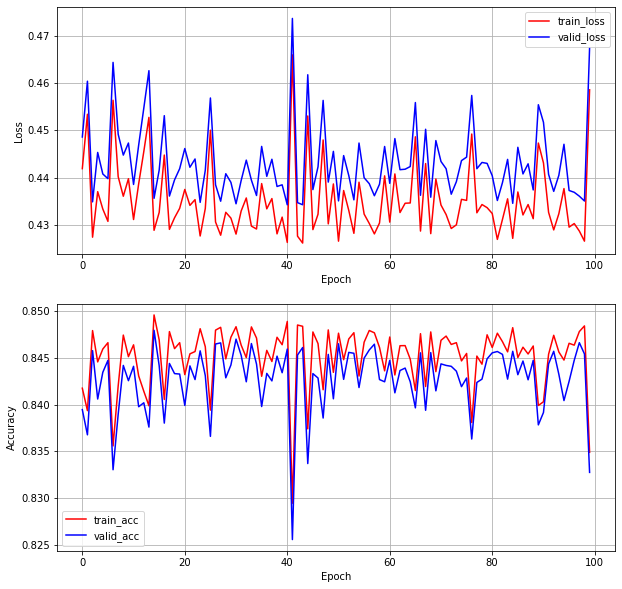

In [14]:
from torch.utils.data import TensorDataset, DataLoader

class ModelSet(torch.nn.Module):
    def __init__(self):
        super(ModelSet,self).__init__()
        self.net = torch.nn.Sequential(torch.nn.Linear(300,4),) #(300,4)の線形モデルをセット
    def forward(self,x):
        return self.net(x)

def accuracy(pred,real):
    pred = np.argmax(pred.data.numpy(),axis=1)
    real = real.data.numpy()
    sum_acc = 0
    for p,r in zip(pred, real):
        if p == r:
            sum_acc += 1
    k = sum_acc / len(real)
    return k

#trainデータの読み込み
X_train = np.loadtxt("Part8_Result/X_train.txt",delimiter=" ",encoding="utf-8_sig")
Y_train = np.loadtxt("Part8_Result/Y_train.txt",encoding="utf-8_sig",skiprows=1)

X_train_torch = torch.tensor(X_train,dtype=torch.float32)
Y_train_torch = torch.tensor(Y_train,dtype=torch.int64)

#validデータの読み込み
X_valid = np.loadtxt("Part8_Result/X_valid.txt",delimiter=" ",encoding="utf-8_sig")
Y_valid = np.loadtxt("Part8_Result/Y_valid.txt",encoding="utf-8_sig",skiprows=1)

X_valid_torch = torch.tensor(X_valid,dtype=torch.float32)
Y_valid_torch = torch.tensor(Y_valid,dtype=torch.int64)


model = ModelSet() #モデルをセット
DataSet = TensorDataset(X_train_torch,Y_train_torch) #データを読み込み

#DataLoaderを作っとく
Loader = DataLoader(DataSet,batch_size=1,shuffle=True)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.net.parameters(),lr=1e-1)

#pltで簡単に作ることにする
epochs = []
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for epoch in range(100): #epoch数をn回にする
    #一応epoch数もラベルとして使うので、格納
    epochs.append(epoch)
    
    t1 = time.time()
    
    for xx,yy in Loader: #データはloader内に入っているモノ
        y_pred = model(xx) #モデルから予想するよ
        loss = loss_fn(y_pred, yy) #lossを計算
        optimizer.zero_grad() #勾配の初期化
        loss.backward() #ロスの計算
        optimizer.step() #パラメータの更新
    
    t2 = time.time()
    #print("今回のエポックの計算時間は" + str(t2-t1))
    
    #lossとoptimizerの値を抽出する
    import pickle
    with open("Part8_Result/model_state_dict","wb") as e:
        pickle.dump(model.state_dict(),e)
    with open("Part8_Result/model_optimizer_dict","wb") as f:
        pickle.dump(optimizer.state_dict(),f)
    
    #trainデータに対して
    Y_train_pred = model(X_train_torch) #モデルに突っ込む
    loss_train = loss_fn(Y_train_pred, Y_train_torch) #予想と実際のロスの計算
    train_loss.append(loss_train) #配列にappend
    acc_train  = accuracy(Y_train_pred, Y_train_torch) #精度の計算
    train_acc.append(acc_train) #配列にappend
    
    #validデータに対して
    Y_valid_pred = model(X_valid_torch) #モデルに突っ込む
    loss_valid = loss_fn(Y_valid_pred, Y_valid_torch) #予想と実際のロスの計算
    valid_loss.append(loss_valid) #配列にappend
    acc_valid  = accuracy(Y_valid_pred, Y_valid_torch) #精度の計算
    valid_acc.append(acc_valid) #配列にappend
    
    t3 = time.time()
    #print("今回のロス・精度の計算時間は" + str(t3-t2))

#横軸にepoch数、縦軸にlossとaccuracyを取ったグラフを書く
fig, ax = plt.subplots(2,1,figsize=(10,10))
#EpochとLoss
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].grid()
ax[0].plot(epochs, train_loss, color="red", label="train_loss")
ax[0].plot(epochs, valid_loss, color="blue", label="valid_loss")
ax[0].legend(loc=0)
#Epochとaccuracy
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].grid()
ax[1].plot(epochs, train_acc, color="red", label="train_acc")
ax[1].plot(epochs, valid_acc, color="blue", label="valid_acc")
ax[1].legend(loc=0)

plt.show()

## 第77問

[77.87428319454193, 40.66462171077728, 21.38249340057373, 11.585683631896973, 6.748696804046631, 4.327873015403748, 3.0879080295562744, 2.519460129737854, 2.331764650344849, 2.158926796913147, 2.2918713092803955, 2.4759789943695067, 2.7340888023376464, 2.8416019678115845, 2.928867292404175, 2.992398405075073, 3.0019720554351808, 3.046453332901001, 3.0913335561752318, 3.087443804740906]


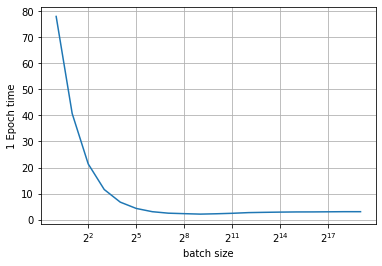

In [15]:
from torch.utils.data import TensorDataset, DataLoader

class ModelSet(torch.nn.Module):
    def __init__(self):
        super(ModelSet,self).__init__()
        self.net = torch.nn.Sequential(torch.nn.Linear(300,4),) #(300,4)の線形モデルをセット
    def forward(self,x):
        return self.net(x)

def accuracy(pred,real):
    pred = np.argmax(pred.data.numpy(),axis=1)
    real = real.data.numpy()
    sum_acc = 0
    for p,r in zip(pred, real):
        if p == r:
            sum_acc += 1
    k = sum_acc / len(real)
    return k

#trainデータの読み込み
X_train = np.loadtxt("Part8_Result/X_train.txt",delimiter=" ",encoding="utf-8_sig")
Y_train = np.loadtxt("Part8_Result/Y_train.txt",encoding="utf-8_sig",skiprows=1)

X_train_torch = torch.tensor(X_train,dtype=torch.float32)
Y_train_torch = torch.tensor(Y_train,dtype=torch.int64)

#validデータの読み込み
X_valid = np.loadtxt("Part8_Result/X_valid.txt",delimiter=" ",encoding="utf-8_sig")
Y_valid = np.loadtxt("Part8_Result/Y_valid.txt",encoding="utf-8_sig",skiprows=1)

X_valid_torch = torch.tensor(X_valid,dtype=torch.float32)
Y_valid_torch = torch.tensor(Y_valid,dtype=torch.int64)


model = ModelSet() #モデルをセット
DataSet = TensorDataset(X_train_torch,Y_train_torch) #データを読み込み

loss_fn = torch.nn.CrossEntropyLoss()

BS = []
BS_time = []

for i in range(20):
    BS.append(2**i)
    
for bs in BS:
    #DataLoaderを作っとく
    Loader = DataLoader(DataSet,batch_size=bs,shuffle=True)
    optimizer = torch.optim.SGD(model.net.parameters(),lr=1e-1)
    
    Provisional_time = []
    
    for epoch in range(10): #epoch数をn回にする
        t1 = time.time()
        
        for xx,yy in Loader: #データはloader内に入っているモノ
            y_pred = model(xx) #モデルから予想するよ
            loss = loss_fn(y_pred, yy) #lossを計算
            optimizer.zero_grad() #勾配の初期化
            loss.backward() #ロスの計算
            optimizer.step() #パラメータの更新
    
        t2 = time.time()
        
        Provisional_time.append(t2-t1) #epoch数分の実行時間を取得
    
    k = sum(Provisional_time)/len(Provisional_time)
    
    BS_time.append(k) #bs単位で時間を記録したいので、epochのfor文内に入れてしまうと、epoch毎に記録してしまう
    
print(BS_time)

#pltで確認
plt.xlabel("batch size")
plt.ylabel("1 Epoch time")
plt.xscale("log",basex=2)
plt.grid()
plt.plot(BS,BS_time)
plt.show()

## 第78問

In [29]:
torch.cuda.empty_cache()

In [30]:
torch.cuda.is_available()

True

313.3611924648285
312.3694005012512
318.8859438896179
306.78014278411865
307.2745635509491
173.44763016700745
171.8825466632843
171.78523015975952
171.5644006729126
171.42446279525757
89.25556778907776
89.45240807533264
89.2246823310852
89.2945704460144
89.32610869407654
48.26465439796448
48.151739835739136
48.09888243675232
48.12814426422119
48.060582876205444
27.55335760116577
27.611571311950684
27.63603663444519
27.472919940948486
27.647032737731934
[311.7342486381531, 172.02085409164428, 89.31066746711731, 48.14080076217651, 27.584183645248412]


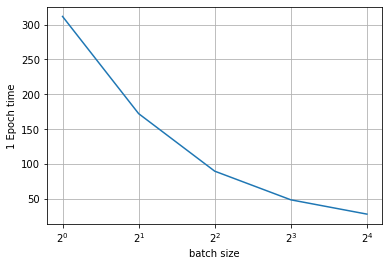

In [12]:
from torch.utils.data import TensorDataset, DataLoader

class ModelSet(torch.nn.Module):
    def __init__(self):
        super(ModelSet,self).__init__()
        self.net = torch.nn.Sequential(torch.nn.Linear(300,4),) #(300,4)の線形モデルをセット
    def forward(self,x):
        return self.net(x)

def accuracy(pred,real):
    pred = np.argmax(pred.data.numpy(),axis=1)
    real = real.data.numpy()
    sum_acc = 0
    for p,r in zip(pred, real):
        if p == r:
            sum_acc += 1
    k = sum_acc / len(real)
    return k

#trainデータの読み込み
X_train = np.loadtxt("Part8_Result/X_train.txt",delimiter=" ",encoding="utf-8_sig")
Y_train = np.loadtxt("Part8_Result/Y_train.txt",encoding="utf-8_sig",skiprows=1)

X_train_torch = torch.tensor(X_train,dtype=torch.float32)
Y_train_torch = torch.tensor(Y_train,dtype=torch.int64)

#validデータの読み込み
X_valid = np.loadtxt("Part8_Result/X_valid.txt",delimiter=" ",encoding="utf-8_sig")
Y_valid = np.loadtxt("Part8_Result/Y_valid.txt",encoding="utf-8_sig",skiprows=1)

X_valid_torch = torch.tensor(X_valid,dtype=torch.float32)
Y_valid_torch = torch.tensor(Y_valid,dtype=torch.int64)


model = ModelSet() #モデルをセット
#GPUでの学習に変更
'''
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
'''
device = torch.device("cuda")

#GPUでの場合は、to(GPU)にする
model = model.to(device)
DataSet = TensorDataset(X_train_torch.to(device),Y_train_torch.to(device)) #データを読み込み
loss_fn = torch.nn.CrossEntropyLoss()

BS = []
BS_time = []

for i in range(5):
    BS.append(2**i)
    
for bs in BS:
    #DataLoaderを作っとく
    Loader = DataLoader(DataSet,batch_size=bs,shuffle=True)
    optimizer = torch.optim.SGD(model.net.parameters(),lr=1e-1)
    
    Provisional_time = []
    
    for epoch in range(5): #epoch数をn回にする
        t1 = time.time()
        
        for xx,yy in Loader: #データはloader内に入っているモノ
            y_pred = model(xx)#モデルから予想するよ
            loss = loss_fn(y_pred, yy) #lossを計算
            optimizer.zero_grad() #勾配の初期化
            loss.backward() #ロスの計算
            optimizer.step() #パラメータの更新
    
        t2 = time.time()
        print(t2-t1)
        
        Provisional_time.append(t2-t1) #epoch数分の実行時間を取得
    
    k = sum(Provisional_time)/len(Provisional_time)
    
    BS_time.append(k) #bs単位で時間を記録したいので、epochのfor文内に入れてしまうと、epoch毎に記録してしまう
    
print(BS_time)

#pltで確認
plt.xlabel("batch size")
plt.ylabel("1 Epoch time")
plt.xscale("log",basex=2)
plt.grid()
plt.plot(BS,BS_time)
plt.show()

## 第79問

In [6]:
torch.cuda.empty_cache()

643.4694530963898
655.9180455207825
660.9220383167267
657.5164332389832
659.1617319583893
340.659729719162
339.559787273407
342.65708208084106
340.4030499458313
341.72719383239746
168.37843799591064
168.35639810562134
168.4599471092224
168.2791097164154
168.40965604782104
86.76044130325317
86.84159302711487
86.69651365280151
87.07040667533875
86.61805891990662
46.25768446922302
46.17894101142883
46.2669882774353
46.40484261512756
46.16248631477356


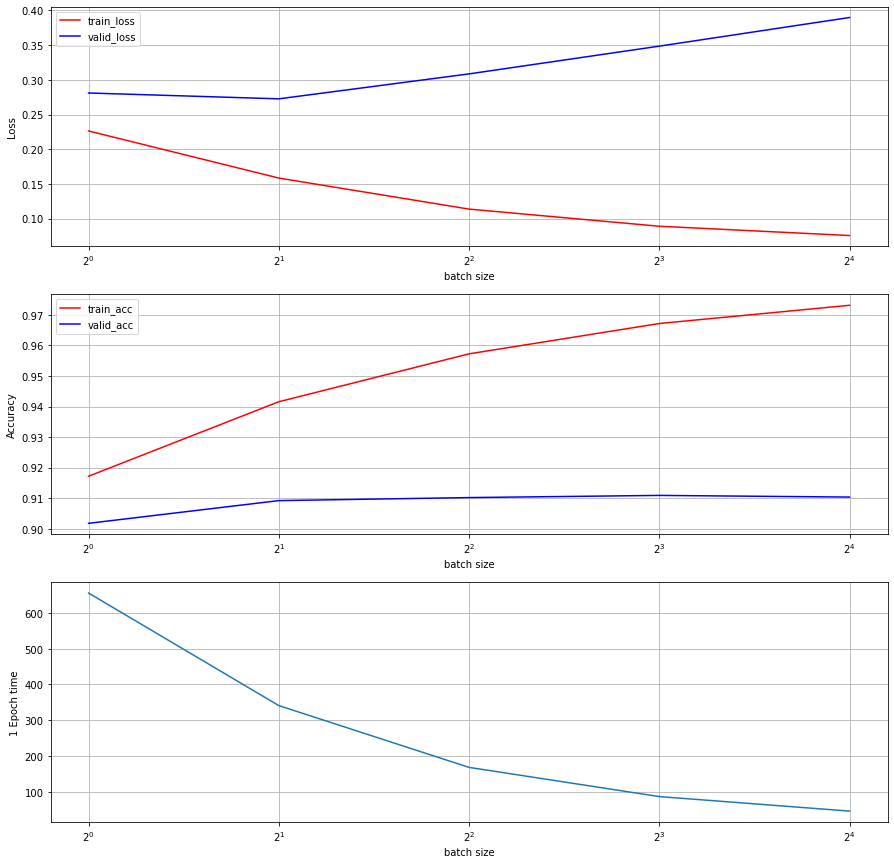

In [6]:
from torch.utils.data import TensorDataset, DataLoader
import time

class ModelSet(torch.nn.Module):
    def __init__(self):
        super(ModelSet,self).__init__()
        self.net = torch.nn.Sequential(torch.nn.Linear(300,4),) #(300,4)の線形モデルをセット
    def forward(self,x):
        return self.net(x)
    
class ModelSet1(torch.nn.Module):
    def __init__(self):
        super(ModelSet1,self).__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(300,200),  #(300,200)の線形モデルをセット
            torch.nn.ReLU(),
            torch.nn.Linear(200,100),
            torch.nn.Sigmoid(),
            torch.nn.Linear(100,4),
        ) 
    def forward(self,x):
        return self.net(x)

def accuracy(pred,real):
    pred = np.argmax(pred.data.cpu().numpy(),axis=1)
    real = real.data.cpu().numpy()
    sum_acc = 0
    for p,r in zip(pred, real):
        if p == r:
            sum_acc += 1
    k = sum_acc / len(real)
    return k

#trainデータの読み込み
X_train = np.loadtxt("Part8_Result/X_train.txt",delimiter=" ",encoding="utf-8_sig")
Y_train = np.loadtxt("Part8_Result/Y_train.txt",encoding="utf-8_sig",skiprows=1)

X_train_torch = torch.tensor(X_train,dtype=torch.float32)
Y_train_torch = torch.tensor(Y_train,dtype=torch.int64)

#validデータの読み込み
X_valid = np.loadtxt("Part8_Result/X_valid.txt",delimiter=" ",encoding="utf-8_sig")
Y_valid = np.loadtxt("Part8_Result/Y_valid.txt",encoding="utf-8_sig",skiprows=1)

X_valid_torch = torch.tensor(X_valid,dtype=torch.float32)
Y_valid_torch = torch.tensor(Y_valid,dtype=torch.int64)


model = ModelSet1() #モデルをセット

#GPUでの学習に変更
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

#GPUでの場合は、to(GPU)にする
model = model.to(device)
DataSet = TensorDataset(X_train_torch.to(device),Y_train_torch.to(device)) #データを読み込み
loss_fn = torch.nn.CrossEntropyLoss()

BS = []
BS_time = []

train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for i in range(5):
    
    BS.append(2**i)
    
for bs in BS:
    #DataLoaderを作っとく
    Loader = DataLoader(DataSet,batch_size=bs,shuffle=True)
    optimizer = torch.optim.SGD(model.net.parameters(),lr=1e-1)
    
    Provisional_time = []
    
    for epoch in range(5): #epoch数をn回にする
        t1 = time.time()
        
        for xx,yy in Loader: #データはloader内に入っているモノ
            y_pred = model(xx)#モデルから予想するよ
            loss = loss_fn(y_pred, yy) #lossを計算
            optimizer.zero_grad() #勾配の初期化
            loss.backward() #ロスの計算
            optimizer.step() #パラメータの更新
    
        t2 = time.time()
        print(t2-t1)
        
        Provisional_time.append(t2-t1) #epoch数分の実行時間を取得
        
    #trainデータに対して
    Y_train_pred = model(X_train_torch.to(device)) #モデルに突っ込む
    loss_train = loss_fn(Y_train_pred, Y_train_torch.to(device)) #予想と実際のロスの計算
    train_loss.append(loss_train) #配列にappend
    acc_train  = accuracy(Y_train_pred, Y_train_torch.to(device)) #精度の計算
    train_acc.append(acc_train) #配列にappend
    
    #validデータに対して
    Y_valid_pred = model(X_valid_torch.to(device)) #モデルに突っ込む
    loss_valid = loss_fn(Y_valid_pred, Y_valid_torch.to(device)) #予想と実際のロスの計算
    valid_loss.append(loss_valid) #配列にappend
    acc_valid  = accuracy(Y_valid_pred, Y_valid_torch.to(device)) #精度の計算
    valid_acc.append(acc_valid) #配列にappend
    
    
    k = sum(Provisional_time)/len(Provisional_time)
    
    BS_time.append(k) #bs単位で時間を記録したいので、epochのfor文内に入れてしまうと、epoch毎に記録してしまう
    
    #batch sizeを増やすとGPUのメモリ不足になるので、逐次開放していく(usedのは減らない)
    
    #結局、batch sizeを5まで減らさないと、GPUのメモリ不足(正確に言うと、5変化までが限界)
    #shutdownしないと、GPUメモリは開放されないので、セルを分けても無駄
    torch.cuda.empty_cache()

#横軸にepoch数、縦軸にlossとaccuracyを取ったグラフを書く
fig, ax = plt.subplots(3,1,figsize=(15,15))
#EpochとLoss
ax[0].set_xlabel("batch size")
ax[0].set_ylabel("Loss")
ax[0].set_xscale("log",basex=2)
ax[0].grid()
ax[0].plot(BS, train_loss, color="red", label="train_loss")
ax[0].plot(BS, valid_loss, color="blue", label="valid_loss")
ax[0].legend(loc=0)
#Epochとaccuracy
ax[1].set_xlabel("batch size")
ax[1].set_ylabel("Accuracy")
ax[1].set_xscale("log",basex=2)
ax[1].grid()
ax[1].plot(BS, train_acc, color="red", label="train_acc")
ax[1].plot(BS, valid_acc, color="blue", label="valid_acc")
ax[1].legend(loc=0)

#pltで確認
ax[2].set_xlabel("batch size")
ax[2].set_ylabel("1 Epoch time")
ax[2].set_xscale("log",basex=2)
ax[2].grid()
ax[2].plot(BS,BS_time)
plt.show()